Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following questions

Note -

1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015

● Draw plots to show the distribution between city and electric vehicle type


In [29]:
# Importing required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Importing Data after download
data = pd.read_csv("ev.csv")
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [31]:
data.shape

(130443, 17)

In [32]:
#Checking for null values
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [33]:
# Handling null values
data.dropna(axis=0, inplace= True)

In [34]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [35]:
data.shape

(129889, 17)

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [36]:
# finding out unique values of clean alternative fuel vehicle (CAFV) Eligibility column
data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [37]:
# Categorizing the values of clean alternative fuel vehicle (CAFV) Column into Eligible, Not Eligible, Unknown
replacement = {'Clean Alternative Fuel Vehicle Eligible':"Eligible",
               'Not eligible due to low battery range' : "Not Eligible",
            'Eligibility unknown as battery range has not been researched' : 'Unknown'
               }
data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].replace(replacement)

In [38]:
#Filtering data based on the cars and their types that do not qualify for clean alternative fuel vehicle
filtered_data = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not Eligible'][['Make', 'Model', 'Electric Vehicle Type']]
filtered_data

,Make,Model,Electric Vehicle Type
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
15,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
130377,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130385,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV)
130390,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV)
130407,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV)


In [39]:
filtered_data[filtered_data["Electric Vehicle Type"]== "Battery Electric Vehicle (BEV)"].count()

Make                     9
Model                    9
Electric Vehicle Type    9
dtype: int64

In [40]:
filtered_data[filtered_data["Electric Vehicle Type"]== "Plug-in Hybrid Electric Vehicle (PHEV)"].count()

Make                     16370
Model                    16370
Electric Vehicle Type    16370
dtype: int64

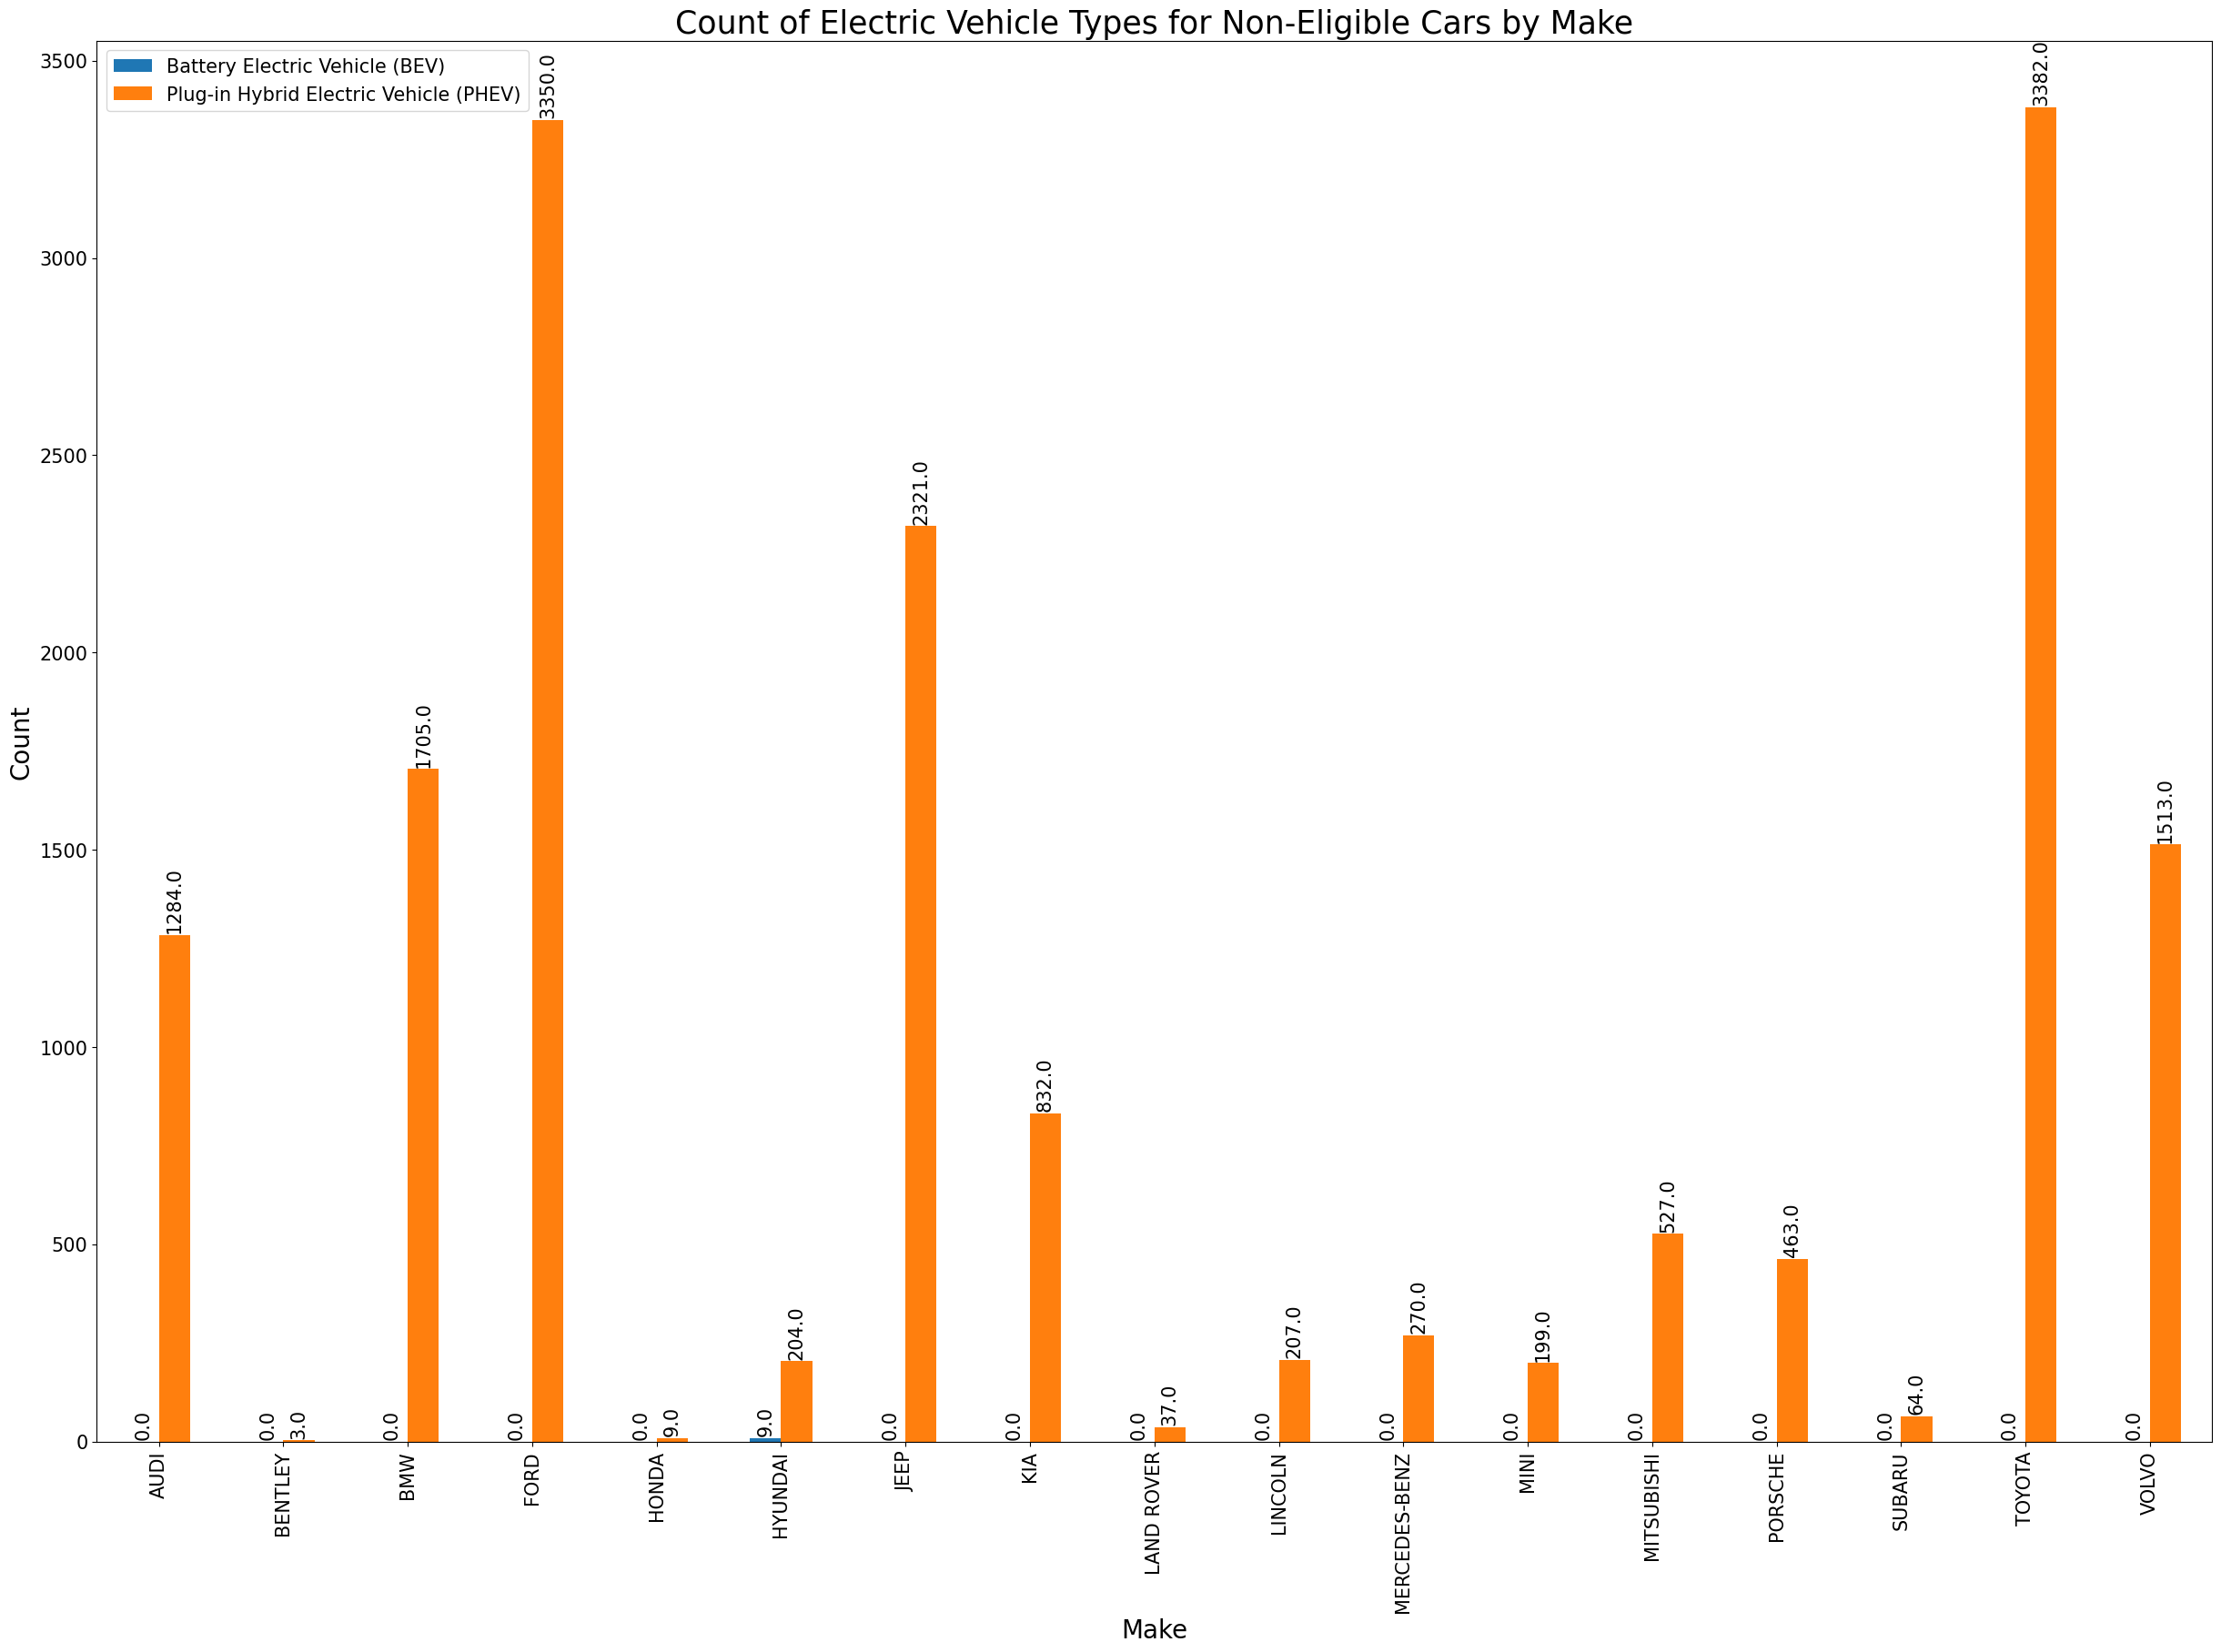

In [41]:

filtered_data = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not Eligible'][['Make', 'Model', 'Electric Vehicle Type']]

counts = filtered_data.groupby(['Make', 'Electric Vehicle Type']).size().unstack()
# Create the figure and axes
fig, ax = plt.subplots(figsize=(30, 20))  
# Use the axes to plot the data
counts.plot(kind='bar', stacked=False, ax=ax)  

plt.xlabel('Make',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Count of Electric Vehicle Types for Non-Eligible Cars by Make',fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.legend(loc='upper left',fontsize=15)

# Add data labels
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        x = rect.get_x() + rect.get_width() / 2
        y = height + 5  # Adjust the offset for label positioning
        ax.text(x, y, height, ha='center', va='bottom', rotation=90, fontsize=15)

plt.show()


Insight:

###### Toyota is having the most number of Plugin Hybrid Electric Vehicle(3382) that are not eligible for Clean Alternative Fuel Vehicle(CAFV).

###### Hyundai is having the most number of Battery Electric Vehicle (9) that are not eligible for Clean Alternative Fuel Vehicle(CAFV).

● Get all TESLA cars with the model year, and model type made in Bothell City.

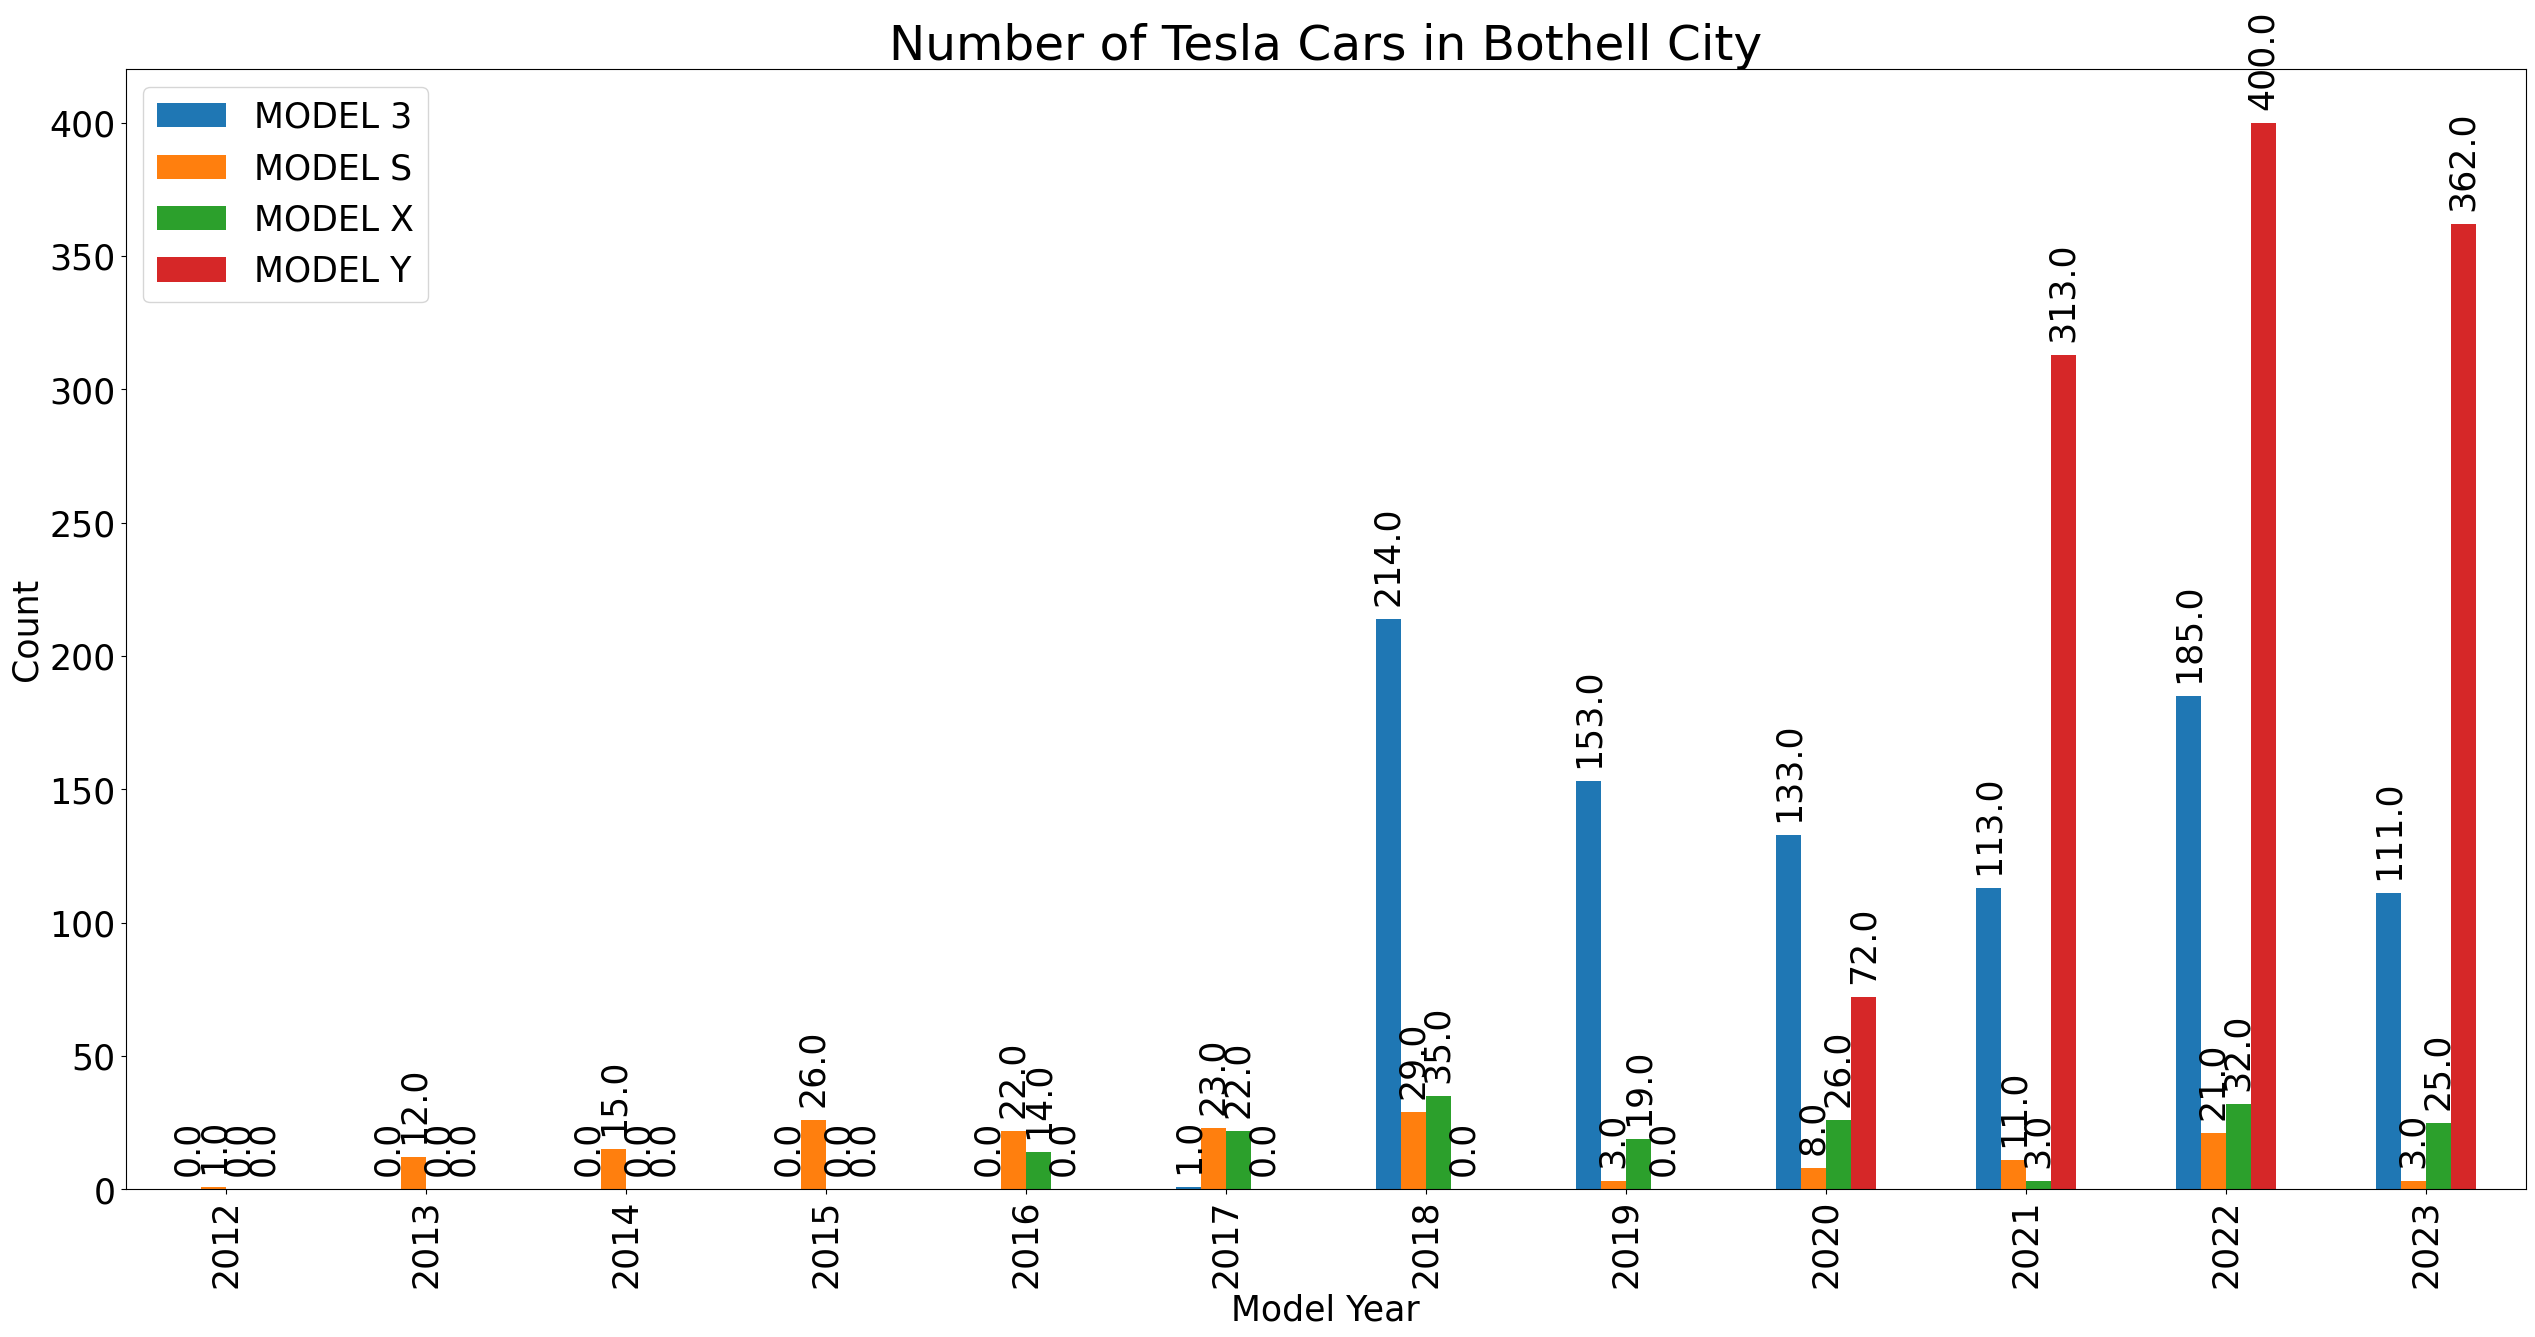

In [42]:
# Filtering Data based on make and city
tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')]
tesla_cars_bothell_filtered = tesla_cars_bothell[['Model Year', 'Model']]

# Grouping by Model Year and Model and getting the counts
counts = tesla_cars_bothell_filtered.groupby(['Model Year', 'Model']).size().unstack()

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(30, 16))

# Plotting the bar graph
counts.plot(kind='bar', stacked=False, ax=ax)

plt.xlabel('Model Year',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.title('Number of Tesla Cars in Bothell City',fontsize=35)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(rotation=0,fontsize=25)
plt.legend(loc='upper left',fontsize=25)

# Add data labels
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        x = rect.get_x() + rect.get_width() / 2
        y = height + 5  # Adjust the offset for label positioning
        ax.text(x, y, height, ha='center', va='bottom', rotation=90, fontsize=25)

# Adjust the margins
plt.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)

plt.show()


Insight:

###### Most of Tesla car models made in Bothell city during 2012 to 20223

###### In the year 2022 maximum numbers of Tesla Model Y cars (400)  were made.

###### In the year 2018 maximum number of Tesla Model X (35), Model S(29), Model 3(214) were made.

● Get all the cars that have an electric range of more than 100, and were made after 2015

In [43]:
#filtering data based on electric range of cars and model year
electric_cars = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
electric_cars

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


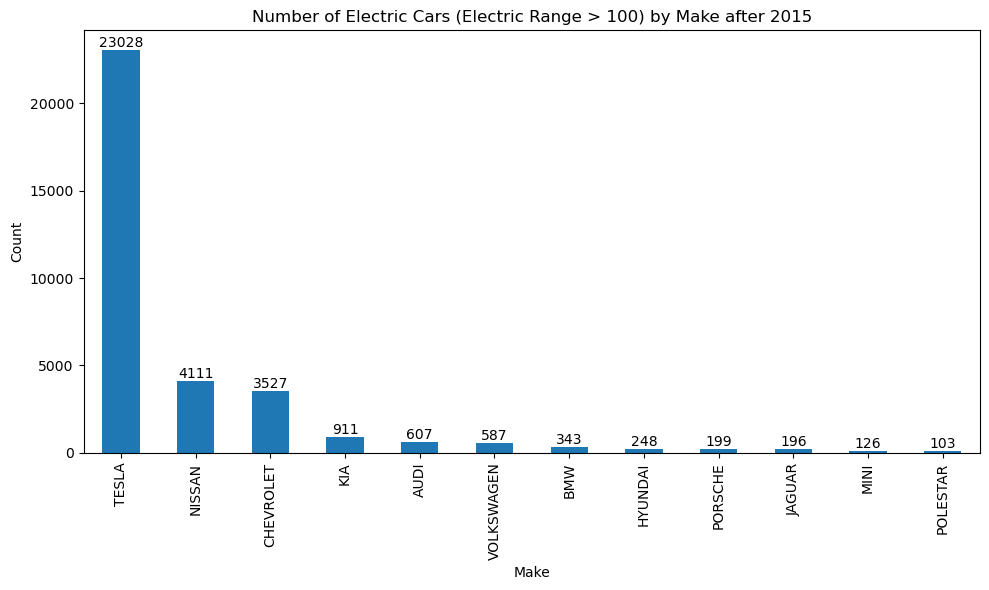

In [44]:
# Plotting the graph
counts = electric_cars['Make'].value_counts()
plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Number of Electric Cars (Electric Range > 100) by Make after 2015')
plt.xticks(rotation=90)
plt.tight_layout()
# Add data labels
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Insight:

###### From the above graph it is clear that Tesla has most number of cars made after 2015 that are having range more than 100 & Polestar has the least number of cars.

● Draw plots to show the distribution between city and electric vehicle type

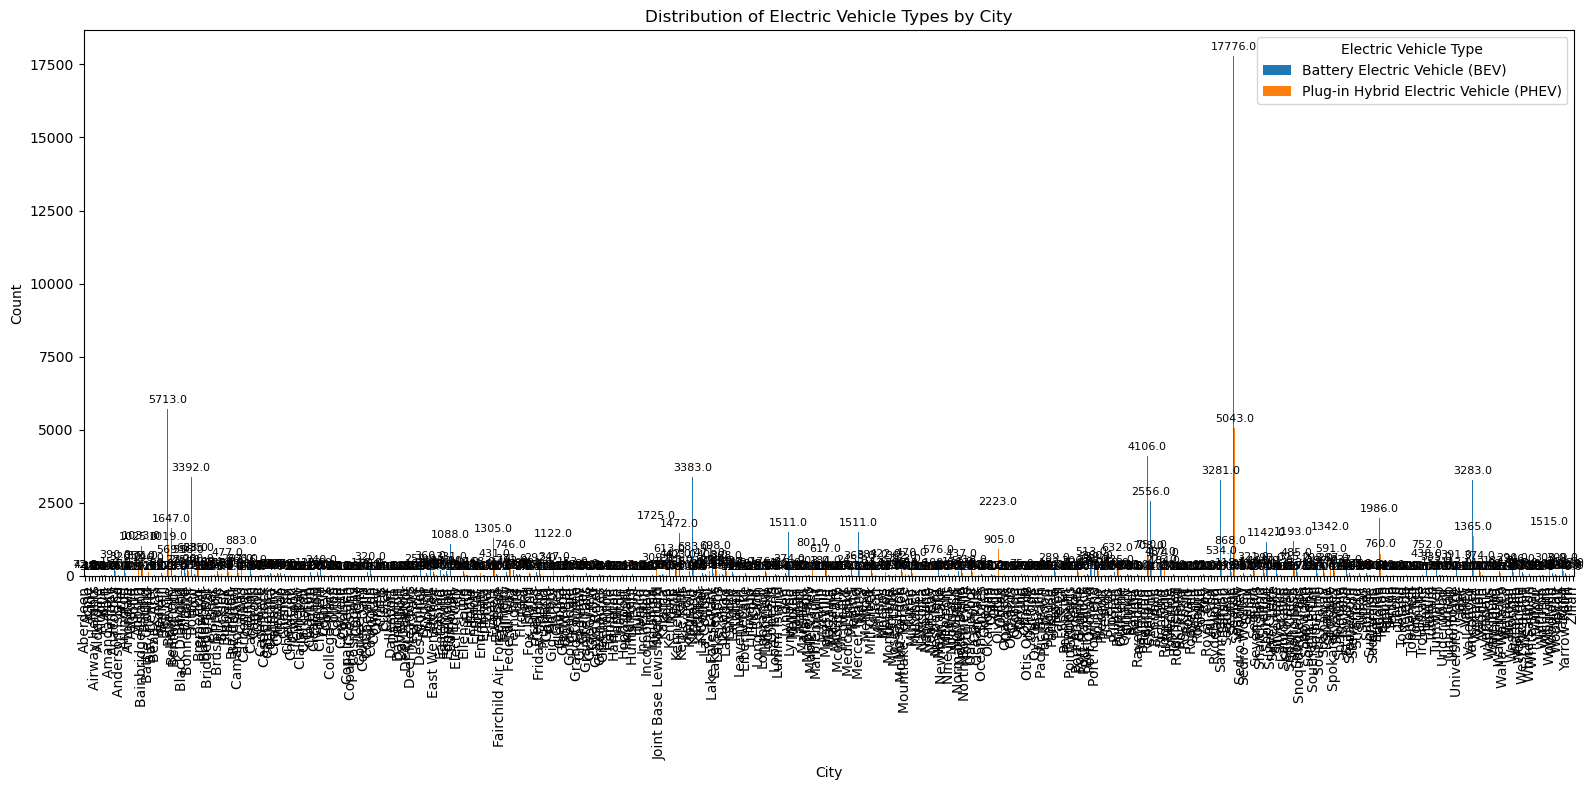

In [45]:
# Group the data by 'City' and 'Electric Vehicle Type' and calculate the counts
city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Bar plot - distribution of electric vehicle types by city
fig, ax = plt.subplots(figsize=(16, 8)) 
city_ev_type_counts.plot(kind='bar', stacked=False, ax=ax)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.xticks(rotation=90)
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
# Add data labels
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)
plt.show()



In [46]:
# Calculate the sum of counts for each city
city_counts = city_ev_type_counts.sum(axis=1)

# Sort the cities in descending order based on the counts
sorted_cities = city_counts.sort_values(ascending=False)

# Select the top 5 cities
top_5_cities = sorted_cities.head(5)

print(top_5_cities)

City
Seattle      22819.0
Bellevue      6732.0
Redmond       4814.0
Vancouver     4648.0
Kirkland      4066.0
dtype: float64


In [47]:
# Group the data by 'City' and 'Electric Vehicle Type' and calculate the counts
city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Sum the counts of Battery Electric Vehicle (BEV) for each city
city_bev_counts = city_ev_type_counts['Battery Electric Vehicle (BEV)']

# Sort the cities based on the BEV counts in descending order and select the top 5 cities
top_5_cities = city_bev_counts.sort_values(ascending=False).head(5)

print(top_5_cities)

City
Seattle     17776.0
Bellevue     5713.0
Redmond      4106.0
Bothell      3392.0
Kirkland     3383.0
Name: Battery Electric Vehicle (BEV), dtype: float64


In [48]:
# Group the data by 'City' and 'Electric Vehicle Type' and calculate the counts
city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Sum the counts of Battery Electric Vehicle (BEV) for each city
city_bev_counts = city_ev_type_counts['Plug-in Hybrid Electric Vehicle (PHEV)']

# Sort the cities based on the BEV counts in descending order and select the top 5 cities
top_5_cities = city_bev_counts.sort_values(ascending=False).head(5)

print(top_5_cities)

City
Seattle      5043.0
Vancouver    1365.0
Bellevue     1019.0
Olympia       905.0
Tacoma        760.0
Name: Plug-in Hybrid Electric Vehicle (PHEV), dtype: float64


Insight:

Top 5 Cities with most electric cars:

1. Seattle City has the most number of electric cars (22819). There are 17776 numbers of BEV & 5043 numbers of PHEV in Seattle.

2. Bellevue City has 6732 number of electric cars out of which 5713 are BEV & 1019 are PHEV.

3. Redmond has 4814 number of electric cars out of which 4106 are BEV & 708 are PHEV.

4. Vancouver has 4648 number of electric cars out of which 3283 are BEV & 1365 are PHEV.

5. Kirkland has 4066 number of electric cars out of which 3383 are BEV & 683 are PHEV.